In [9]:
# import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

basic_episode_ratings = pd.read_csv('basic_episode_ratings.csv')
basic_series_ratings = pd.read_csv('basic_series_ratings.csv')

# @st.cache

Information courtesy of
IMDb
(https://www.imdb.com).
Used with permission.

https://developer.imdb.com/non-commercial-datasets/

In [13]:
tv_series_name = "The Office"
basic_series_ratings

,tconst,averageRating,titleType,primaryTitle,originalTitle
0,tt0035803,8.2,tvSeries,The German Weekly Review,Die Deutsche Wochenschau
1,tt0039120,2.7,tvSeries,Americana,Americana
2,tt0039123,8.1,tvSeries,Kraft Theatre,Kraft Television Theatre
3,tt0039125,5.4,tvSeries,Public Prosecutor,Public Prosecutor
4,tt0040021,6.9,tvSeries,Actor's Studio,Actor's Studio
...,...,...,...,...,...
91855,tt9915822,7.9,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin
91856,tt9916128,6.1,tvSeries,Salt City (India),Salt City (India)
91857,tt9916206,3.2,tvSeries,Nojor,Nojor
91858,tt9916216,8.8,tvSeries,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai


In [3]:
selected_shows_list = []
selected_shows_Id = []

if not tv_series_name.isspace():
    if not tv_series_name == "":
        
        selected_shows = basic_series_ratings[basic_series_ratings.primaryTitle.str.contains(tv_series_name)]
        selected_shows2 = basic_series_ratings[basic_series_ratings.originalTitle.str.contains(tv_series_name)]
        
        selected_shows = pd.concat([selected_shows, selected_shows2], ignore_index=True)
        
        selected_shows = selected_shows.drop_duplicates()
        
        selected_shows_list = selected_shows['primaryTitle'].tolist()
        
        selected_shows_Id = selected_shows['tconst'].tolist()
        
        selected_shows_list = list(zip(selected_shows_list, selected_shows_Id))
        
selected_shows_list

[('The Office', 'tt0112108'),
 ('The Office', 'tt0290978'),
 ('The Office', 'tt0386676'),
 ('The Office Temps', 'tt0469709'),
 ('The Officer Tatum', 'tt13016298'),
 ('The Office: The Outburst', 'tt1331287'),
 ('The Office: Blackmail', 'tt1494540'),
 ('The Office PL', 'tt15019916'),
 ('The Office: Subtle Sexuality', 'tt1595871'),
 ('The Office: The 3rd Floor', 'tt1740835'),
 ('The Office', 'tt1791001'),
 ('The Office: The Podcast', 'tt1823628'),
 ('The Office: The Girl Next Door', 'tt1941261'),
 ('The Office', 'tt20877972'),
 ('The Office', 'tt2186395'),
 ('The Office: Superfan Episodes', 'tt27738382'),
 ('The Office: The Farewells', 'tt3108666'),
 ('The Office', 'tt8305218')]

In [4]:
# selected_show = st.selectbox('Show: ', selected_shows_list)
selected_show = selected_shows_list[2][1]
selected_show

'tt0386676'

In [5]:
episodes = basic_episode_ratings[basic_episode_ratings['parentTconst'] == selected_show].sort_values(by=['seasonNumber', 'episodeNumber'])
episodes = episodes[['averageRating', 'seasonNumber', 'episodeNumber']]
print(episodes)

        averageRating  seasonNumber  episodeNumber
82907             7.3             1              1
82900             8.1             1              2
82903             7.6             1              3
82909             7.8             1              4
82896             8.2             1              5
...               ...           ...            ...
446401            7.8             9             19
446405            7.8             9             20
466599            9.0             9             21
446403            9.4             9             22
446407            9.8             9             23

[188 rows x 3 columns]


In [6]:
# st.line_chart(episodes, x="episodeNumber", y="averageRating", color="seasonNumber")

def convert(df):
    df=pd.pivot_table(df,index=['episodeNumber'],columns='seasonNumber',values='averageRating',fill_value=np.nan)

    return df
    
    

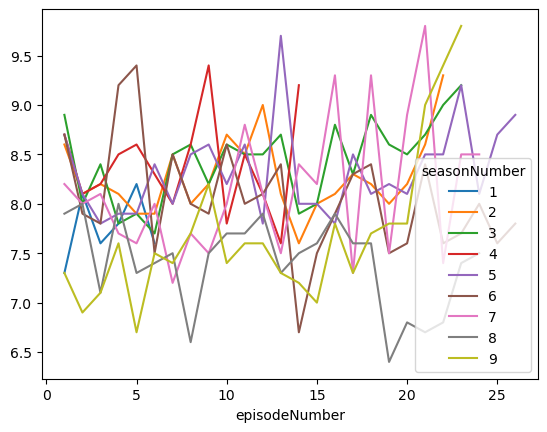

In [7]:
lines = convert(episodes)

line = lines.plot.line()

In [12]:
fig = px.line(lines, markers=True)
fig.show()

In [11]:
fig = px.imshow(lines, text_auto=True, aspect="auto")
fig.show()